<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Supervised%20Learning/Random%20Forest%20and%20Boosting/Random_Forest_and_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest & Boosting

**Random Forest** is an ensemble learning method that builds a large collection of decision trees and aggregates their predictions.  
For regression tasks, the final prediction is the average of all trees’ outputs.

It reduces overfitting and improves generalization by combining multiple weak learners.

# Boosting (Ensemble Methods)

**Boosting** is an ensemble method that builds a strong predictor by sequentially combining multiple weak models (usually shallow decision trees), where each new model focuses on correcting the errors of the previous ones.

Popular boosting algorithms include **AdaBoost**, **Gradient Boosting**, **XGBoost**, **LightGBM**, and **CatBoost**.


## General Process

***Random Forest***


1. **Input**
   A dataset with predictor variables and a continuous target (for regression).

2. **Bootstrap Sampling**
   Randomly sample (with replacement) multiple subsets of the training data.

3. **Grow Multiple Decision Trees**
   - Each tree is trained on a different bootstrapped subset.
   - At each split, a random subset of features is considered.

4. **Aggregate Predictions**
   - For regression: average the predictions from all trees.
   - For classification: use majority voting.

***Gradient Boosting***

1. **Input**
   A dataset with predictors and target variable.

2. **Initialize Weak Learner**
   Start with a simple model (e.g., shallow decision tree).

3. **Sequential Training**
   - Each subsequent model tries to correct the residuals (errors) of the previous model.
   - Weights are adjusted to focus more on hard-to-predict instances.

4. **Aggregate Predictions**
   Combine the outputs of all models into a final prediction (weighted sum for regression).



## Advantages of Random Forest

- **Reduces Overfitting**
  Combines many trees to smooth out individual variances.

- **Handles High-Dimensional Data**
  Works well even with many features.

- **Provides Feature Importance**
  Offers insights into which variables contribute most to predictions.

- **Robust to Noise**
  Less sensitive to outliers than individual trees.



## Disadvantages of Random Forest

- **Less Interpretable**
  Hard to explain how predictions are made compared to simpler models.

- **Computationally Intensive**
  Training and prediction can be slower due to many trees.

- **May Struggle with Extrapolation**
  Like other tree-based models, struggles predicting outside the range of the training data.

## Advantages of Boosting

- **High Predictive Accuracy**
  Often outperforms random forests on structured/tabular data.

- **Handles Complex Patterns**
  Captures subtle interactions between variables.

- **Flexibility**
  Many implementations and hyperparameters to tune (e.g., learning rate, max depth).

- **Robust to Overfitting (with Proper Regularization)**
  Techniques like shrinkage, subsampling, and early stopping help control overfitting.


## Disadvantages of Boosting

- **Sensitive to Noise and Outliers**
  Since each model focuses on correcting previous errors, boosting can overfit to noisy data.

- **Computationally Intensive**
  More training time and hyperparameter tuning compared to simpler models.

- **Requires Careful Tuning**
  Performance depends heavily on parameters like learning rate, number of estimators, and tree depth.


## Application

Used **Random Forest Regressor** and **Gradient Boosting Regressor** to predict participants’ `procrastination_composite` score based on:

### Predictor Variables

- `conscientiousness_composite`  
- `depression_composite`  
- `swb_composite`  
- `social_media_composite`  
- `dedication_composite`  
- `absorption_composite`

### Target Variable

- `procrastination_composite`

(specific descriptions of the variables have been explained in the neural network module)

**Goal:**  
Leverage the ensemble power of random forests and boosting’s sequential correction mechanism to model and compare the combined influence of personality, well-being, and behavioral traits on procrastination.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# import data
url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Leisure_Intereset_Dataset.csv"
li = pd.read_csv(url)
li1 = li[['conscientiousness_composite',
    'depression_composite',
    'swb_composite',
    'social_media_composite',
    'dedication_composite',
    'absorption_composite',
    'procrastination_composite'
]].copy()

predictor = li1[[
    'conscientiousness_composite',
    'depression_composite',
    'swb_composite',
    'social_media_composite',
    'dedication_composite',
    'absorption_composite'
]]
target = li1['procrastination_composite']

X = predictor
y = target

In [ ]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
# 3. Initialize REGRESSION models
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

gb = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

In [ ]:
# 4. Evaluation Functions
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    # Cross-validation (using negative MSE)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"CV MSE: {-np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Regression metrics
    print("\nTest Set Performance:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")

    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Procrastination')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    plt.show()

    return model

=== Random Forest Regression ===
CV MSE: 36.05 ± 9.22

Test Set Performance:
MSE: 13.31
MAE: 2.98
R²: 0.53


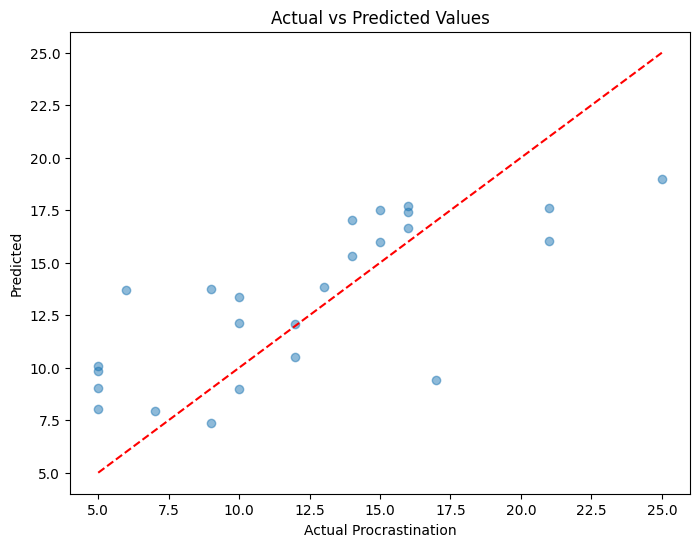


=== Gradient Boosting Regression ===
CV MSE: 44.16 ± 11.17

Test Set Performance:
MSE: 17.26
MAE: 3.35
R²: 0.40


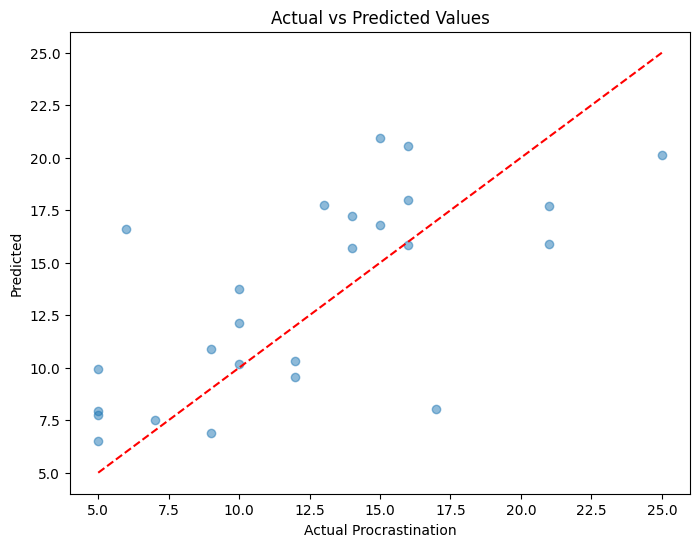

In [ ]:
# 5. Model Evaluation
print("=== Random Forest Regression ===")
rf_model = evaluate_regression(rf, X_train, X_test, y_train, y_test)

print("\n=== Gradient Boosting Regression ===")
gb_model = evaluate_regression(gb, X_train, X_test, y_train, y_test)

Random Forest proves to have better generalization (lower CV MSE with smaller standard deviation), higher explanatory power (R² = 0.53 vs GB's 0.40), and more stable predictions (smaller gap between CV and test MSE). Gradient Boosting's High CV MSE suggests overfitting of data.

Feature Importance Values:
swb_composite                 0.2257
conscientiousness_composite   0.2006
dedication_composite          0.1939
depression_composite          0.1621
social_media_composite        0.1261
absorption_composite          0.0917


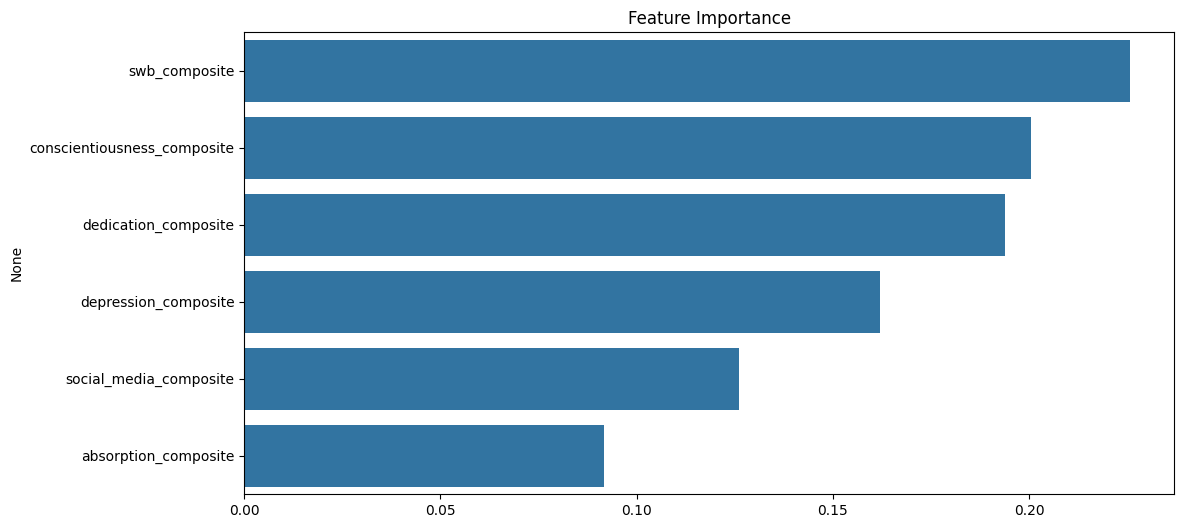

In [21]:
# 6. Feature Importance (works the same for regression)
def plot_feature_importance(model, feature_names):
    imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
    print("Feature Importance Values:")
    print(imp.to_string(float_format="%.4f"))
    plt.figure(figsize=(12,6))
    sns.barplot(x=imp.values, y=imp.index)
    plt.title('Feature Importance')
    plt.show()

plot_feature_importance(rf_model, X.columns)

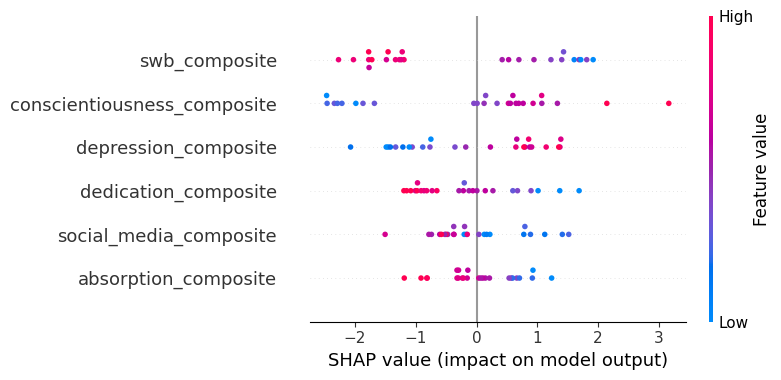

In [17]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

This analysis suggests the model identifies well-being as the primary lever against procrastination, while challenging some conventional assumptions about personality dominance. The patterns warrant further investigation into why dedication rivals conscientiousness and why absorption underperforms theoretical expectations.

In [ ]:
# 7. Ensemble (averaging predictions)
ensemble_pred = (rf_model.predict(X_test) + gb_model.predict(X_test)) / 2
print("\n=== Ensemble Performance ===")
print(f"MSE: {mean_squared_error(y_test, ensemble_pred):.2f}")
print(f"R²: {r2_score(y_test, ensemble_pred):.2f}")


=== Ensemble Performance ===
MSE: 14.57
R²: 0.49


Ensemble performs between RF and GB (expected for simple averaging); might be improved with weighted averaging (e.g., 70% RF + 30% GB)